In [3]:
import matplotlib
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [47]:
import fiona
import pandas as pd
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon, shape
from itertools import chain

In [6]:
shp = fiona.open('data/JAM_adm_shp/JAM_adm1.shp')

In [2]:
sys.path

['',
 '/usr/local/Cellar/python3/3.5.2_1/Frameworks/Python.framework/Versions/3.5/lib/python35.zip',
 '/usr/local/Cellar/python3/3.5.2_1/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/usr/local/Cellar/python3/3.5.2_1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/usr/local/Cellar/python3/3.5.2_1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/site-packages/IPython/extensions',
 '/Users/andrewgrant/.ipython']

In [8]:
pop_parishes = pd.read_csv('data/parish_pop.csv',names=['Parish','Population'])
# Format Strings
idx = 0
for parish in pop_parishes.Parish:
    if "St." in parish:
        pop_parishes.Parish[idx] = 'Saint' + parish[3:]

    idx = idx+1

In [9]:
pop = []
for pol in shp:
    idx = 0
    for parish in pop_parishes.Parish:
        if(pol['properties']['NAME_1'] == parish):
            pop.append(int(pop_parishes.Population[idx].replace(',','')))
        idx = idx + 1

In [21]:
mp = MultiPolygon([shape(pol['geometry']) for pol in shp])

cmap = plt.get_cmap('Blues')

bds = mp.bounds
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

#minx, miny, maxx, maxy = mp.bounds
#w, h = maxx - minx, maxy - miny

#ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
#ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
#ax.set_aspect(1)

In [38]:
pop_parishes = pd.read_csv('data/jm_place.csv')

capitals = pop_parishes[pop_parishes['geonames:feature_code']=='PPLA']
capitals



,name,place,population,admin_level,x,y,geonames:id,geonames:feature_code
303,Spanish Town,city,145018.0,8,-76.95742,17.99107,3488465,PPLA
388,Savanna-la-Mar,town,16553.0,8,-78.13320,18.21895,3488613,PPLA
430,Saint Ann’s Bay,town,13671.0,8,-77.20098,18.43581,3488713,PPLA
598,Port Maria,town,7906.0,8,-76.88946,18.36849,3488985,PPLA
605,Port Antonio,town,14400.0,8,-76.45090,18.17615,3489005,PPLA
846,Morant Bay,town,9368.0,8,-76.40927,17.88145,3489440,PPLA
858,Montego Bay,town,82867.0,8,-77.91883,18.47116,3489460,PPLA
894,May Pen,town,44755.0,8,-77.24515,17.96454,3489523,PPLA
929,Mandeville,town,47115.0,8,-77.50714,18.04168,3489577,PPLA
957,Lucea,town,6289.0,8,-78.17356,18.45095,3489657,PPLA


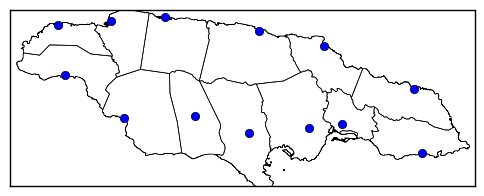

In [66]:
m = Basemap(
    projection='tmerc',
    lon_0=-75.,
    lat_0=18.5,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

for lon,lat in zip(capitals['x'], capitals['y']):
 #   print(m(mapped_x,mapped_y))
    point = m(lon,lat)
    m.plot(point[0],point[1],'bo')

m.readshapefile(
    'data/JAM_adm_shp/JAM_adm1',
    'jamaica',
    zorder=2)

plt.show()

In [15]:
# Create dataframe for map
pop_map = pd.DataFrame({
        'poly': mp, 
        'popu': pop
        })
pop_map

,poly,popu
0,POLYGON ((-77.28597259521479 17.77819442749018...,246322
1,POLYGON ((-78.33791351318359 18.31778144836426...,69874
2,POLYGON ((-76.72610473632812 17.95458221435547...,666041
3,POLYGON ((-77.48729705810536 18.20236396789551...,190812
4,POLYGON ((-76.35819244384766 18.16736030578619...,82183
5,POLYGON ((-76.64042663574213 18.08993148803717...,666041
6,POLYGON ((-77.45295715332026 18.46930503845215...,173232
7,POLYGON ((-76.87819671630859 17.92763900756842...,518345
8,POLYGON ((-77.76097106933588 17.87680435180658...,150993
9,"POLYGON ((-77.772216796875 18.25086784362804, ...",184662


In [ ]:

ax.set_xticks([])
ax.set_yticks([])
plt.title("Jamaica Population")
plt.savefig('data/jamaica_population.png', alpha=True, dpi=300)
plt.show()


In [ ]:
dev = m.scatter(
    -77.91883,18.47116,
    5, marker='o', lw=.25,
    facecolor='#33ccff', edgecolor='w',
    alpha=0.9, antialiased=True,
    label='Capitals', zorder=3)



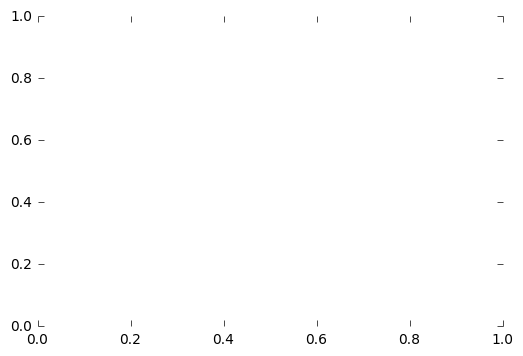

In [18]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)


patches = pop_map['poly'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.2, alpha=1., zorder=4))
pc = PatchCollection(patches, match_original=True)

norm = Normalize()
pc.set_facecolor(cmap(norm(pop_map['popu'].values)))

ax.add_collection(pc)

plt.show()